In [1]:
import pymc as pm
import arviz as az 
import scipy.stats as st 
import numpy as np
import pandas as pd

werbung = pd.read_csv("./data/Werbung.csv").drop(["Unnamed: 0"], axis=1)

werbung.head() 
print(werbung.head())

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


      TV  Radio  Zeitung  Verkauf
0  230.1   37.8     69.2     22.1
1   44.5   39.3     45.1     10.4
2   17.2   45.9     69.3      9.3
3  151.5   41.3     58.5     18.5
4  180.8   10.8     58.4     12.9


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 288 seconds.


array([<Axes: title={'center': 'beta_0'}>,
       <Axes: title={'center': 'beta_1'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

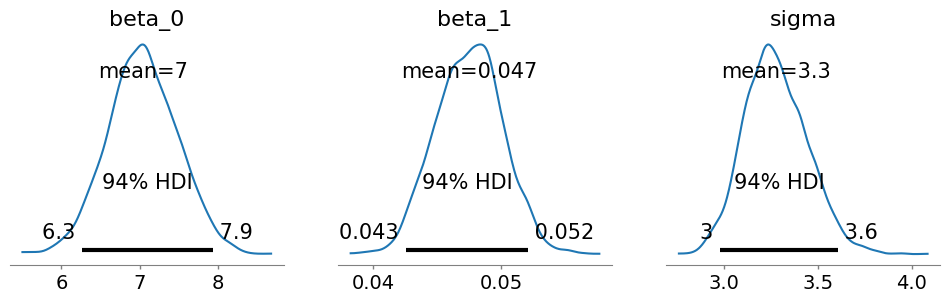

In [2]:
with pm.Model() as model_lb:
    beta_0 = pm.Normal("beta_0", mu=0, sigma=100)
    beta_1 = pm.Normal("beta_1", mu=0, sigma=10)
    sigma = pm.HalfCauchy("sigma", 10)
    mu = pm.Deterministic("mu", beta_0 + beta_1 * werbung.TV) 
    y_pred = pm.Normal("y_pred", mu=mu, sigma=sigma, observed=werbung.Verkauf) 
    idata_lb = pm.sample(random_seed=123)

az.plot_posterior(idata_lb, var_names=["~mu"], figsize=(12, 3))